In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [2]:
with open('../data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

In [3]:
fpgen = Chem.GetMorganGenerator(radius=2)
m1 = Chem.MolFromSmiles('Cc1ccccc1')
fp1 = fpgen.GetSparseCountFingerprint(m1)
fp2 = fpgen.GetFingerprint(m1)

In [4]:
set(key%2048 for key in fp1.GetNonzeroElements().keys()) == set(fp2.GetOnBits())

True

In [5]:
list(fp2.GetOnBits())

[389, 1055, 1057, 1088, 1199, 1380, 1722, 1750, 1823, 1873, 1920]

In [6]:
len(fp2.GetOnBits()) == len(fp1.GetNonzeroElements())

True

In [7]:
DataStructs.TanimotoSimilarity(fp1, fp1)

1.0

In [8]:
def similarity_search(qfp, fps, similarity_treshold=0.8):
    return [idx for idx, fp in enumerate(fps) if DataStructs.TanimotoSimilarity(qfp, fp) >= similarity_treshold]

In [9]:
drug_fps = [fpgen.GetFingerprint(drug) for drug in drugs]
mtor_fps = [fpgen.GetFingerprint(drug) for drug in mtor_ligands]

In [10]:
similarity_search(mtor_fps[123], drug_fps)

[]

In [11]:
similar_mtors = [(idx, similarity_search(qfp, drug_fps)) for idx, qfp in enumerate(mtor_fps)]

In [12]:
len([(m, ds) for m, ds in similar_mtors if len(ds)])

56

In [13]:
[(m, ds) for m, ds in similar_mtors if len(ds)]

[(17, [1099]),
 (23, [760, 1377, 4580]),
 (36, [5903]),
 (77, [760, 1377]),
 (145, [287, 6682]),
 (205, [5905]),
 (211, [5904]),
 (218, [5214]),
 (317, [760, 1377, 4580]),
 (338, [1700]),
 (373, [747]),
 (379, [760, 1377, 4580]),
 (496, [1130]),
 (517, [4580]),
 (540, [5910]),
 (551, [747]),
 (566, [5468]),
 (888, [5904]),
 (889, [5904]),
 (906, [6143]),
 (954, [6143]),
 (1002, [287, 6682]),
 (1045, [2344]),
 (1057, [760]),
 (1060, [2344]),
 (1067, [760, 1377, 4580]),
 (1095, [1141, 5860]),
 (1134, [5121]),
 (1218, [92]),
 (1274, [1575]),
 (1312, [2344]),
 (1322, [760, 1377, 4580]),
 (1391, [2344]),
 (1406, [760, 1377, 4580]),
 (1416, [760, 1377, 4580]),
 (1520, [4580]),
 (1542, [760, 1377, 4580]),
 (1550, [4580]),
 (1600, [2344]),
 (1629, [1700]),
 (1712, [2344]),
 (1730, [2344]),
 (1777, [5904]),
 (1783, [208]),
 (1818, [5905]),
 (1825, [5904]),
 (1826, [5903]),
 (1827, [5904]),
 (1939, [1130]),
 (2024, [760, 1377, 4580]),
 (2796, [2344]),
 (2807, [1756]),
 (3046, [5903]),
 (3047, [5

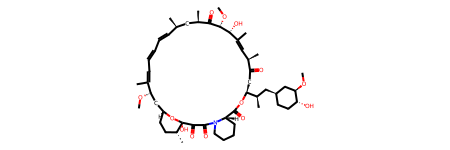

In [14]:
mtor_ligands[2024]

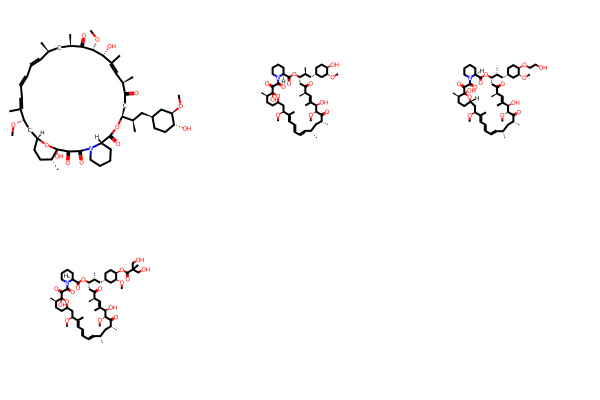

In [15]:
Draw.MolsToGridImage((mtor_ligands[2024], drugs[760], drugs[1377], drugs[4580]))

In [16]:
ao = Chem.AdditionalOutput()
ao.CollectBitInfoMap()
ao.CollectBitPaths()
fp = fpgen.GetSparseCountFingerprint(mtor_ligands[2024],additionalOutput=ao)

In [17]:
ao.GetBitInfoMap()

{10565946: ((13, 1), (15, 1), (23, 1), (40, 1), (52, 1)),
 26892922: ((17, 2),),
 69887201: ((62, 1),),
 98466654: ((59, 1), (60, 1), (61, 1)),
 153234704: ((12, 1),),
 172238518: ((28, 1),),
 205147147: ((37, 2),),
 234364970: ((26, 2),),
 259610089: ((9, 1),),
 262122284: ((25, 1),),
 265892994: ((10, 1),),
 266675433: ((33, 1), (47, 1)),
 301694982: ((29, 2),),
 377947652: ((56, 2),),
 422715066: ((45, 1), (64, 1)),
 462175782: ((28, 2),),
 479202476: ((31, 2),),
 517457164: ((3, 1), (55, 1), (37, 1)),
 530331747: ((14, 2),),
 758494440: ((41, 1),),
 772446440: ((5, 2),),
 781671818: ((61, 2),),
 864662311: ((10, 0), (33, 0), (47, 0)),
 864674487: ((1, 0), (35, 0), (49, 0)),
 864942730: ((13, 0), (15, 0), (23, 0), (40, 0), (52, 0)),
 922375834: ((51, 2),),
 934178987: ((44, 1), (63, 1)),
 968801832: ((34, 2),),
 981072036: ((46, 1),),
 1015593651: ((6, 2),),
 1023190685: ((26, 1),),
 1067305901: ((22, 1),),
 1091340519: ((20, 2),),
 1184436594: ((39, 1),),
 1228528465: ((32, 1),),
 

In [18]:
m = mtor_ligands[2024]

In [19]:
a = m.GetAtomWithIdx(13)

In [20]:
b = list(a.GetBonds())[0]

In [21]:
dir(b)

['ClearProp',
 'DescribeQuery',
 'GetBeginAtom',
 'GetBeginAtomIdx',
 'GetBondDir',
 'GetBondType',
 'GetBondTypeAsDouble',
 'GetBoolProp',
 'GetDoubleProp',
 'GetEndAtom',
 'GetEndAtomIdx',
 'GetIdx',
 'GetIntProp',
 'GetIsAromatic',
 'GetIsConjugated',
 'GetOtherAtom',
 'GetOtherAtomIdx',
 'GetOwningMol',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetSmarts',
 'GetStereo',
 'GetStereoAtoms',
 'GetUnsignedProp',
 'GetValenceContrib',
 'HasOwningMol',
 'HasProp',
 'HasQuery',
 'IsInRing',
 'IsInRingSize',
 'Match',
 'SetBondDir',
 'SetBondType',
 'SetBoolProp',
 'SetDoubleProp',
 'SetIntProp',
 'SetIsAromatic',
 'SetIsConjugated',
 'SetProp',
 'SetStereo',
 'SetStereoAtoms',
 'SetUnsignedProp',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex

In [22]:
connected_atoms = tuple(set((b.GetIdx(), b.GetBeginAtomIdx(), b.GetEndAtomIdx())) for b in m.GetBonds())

In [23]:
connected_atoms

({0, 1},
 {1, 2},
 {2, 3},
 {3, 4},
 {4, 5},
 {5, 6},
 {6, 7},
 {7, 8},
 {7, 8, 9},
 {9, 10},
 {9, 10, 11},
 {9, 11, 12},
 {12, 13},
 {12, 13, 14},
 {14, 15},
 {14, 15, 16},
 {16, 17},
 {17, 18},
 {18, 19},
 {19, 20},
 {20, 21},
 {21, 22},
 {22, 23},
 {22, 23, 24},
 {24, 25},
 {25, 26},
 {26, 27},
 {26, 27, 28},
 {28, 29},
 {29, 30},
 {30, 31},
 {31, 32},
 {32, 33},
 {32, 33, 34},
 {34, 35},
 {35, 36},
 {34, 36, 37},
 {25, 37, 38},
 {38, 39},
 {39, 40},
 {39, 40, 41},
 {41, 42},
 {41, 42, 43},
 {43, 44},
 {44, 45},
 {44, 45, 46},
 {46, 47},
 {46, 47, 48},
 {48, 49},
 {49, 50},
 {48, 50, 51},
 {51, 52},
 {51, 52, 53},
 {53, 54},
 {53, 54, 55},
 {55, 56},
 {56, 57},
 {56, 57, 58},
 {58, 59},
 {59, 60},
 {60, 61},
 {61, 62},
 {62, 63},
 {63, 64},
 {2, 63, 64},
 {4, 11, 65},
 {16, 21, 66},
 {29, 37, 67})

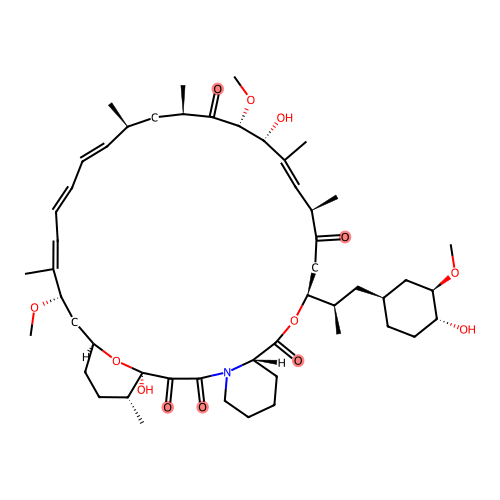

In [24]:
to_hightligth = ((13, 1), (15, 1), (23, 1), (40, 1), (52, 1))
d = rdMolDraw2D.MolDraw2DSVG(500, 500)
rdMolDraw2D.PrepareAndDrawMolecule(d, mtor_ligands[2024], highlightAtoms=[x[0] for x in to_hightligth])
d.FinishDrawing()
SVG(d.GetDrawingText())